# Projet :

## Analyse des données du marché du jeu vidéo de 1985 à 2016

In [161]:
import pandas as pd, seaborn as sb, matplotlib as mpl

In [185]:
df = pd.read_csv('data/videoGames.csv').sort_values('Year_of_Release', ascending=False)
df.shape

(16719, 16)

In [163]:
#df = df.dropna()
df.shape

(16719, 16)

In [184]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
262,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
2650,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,NaN,NaN,NaN,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.0,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

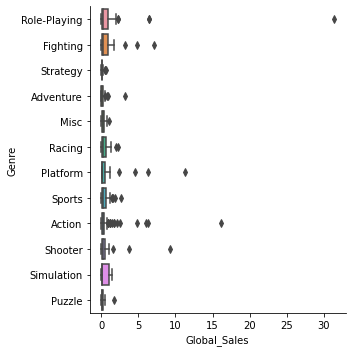

In [166]:
#catplot
g = sb.catplot(x="Global_Sales", y="Genre",data=df.sample(500), kind='box') #.query('Global_Sales > 5')

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

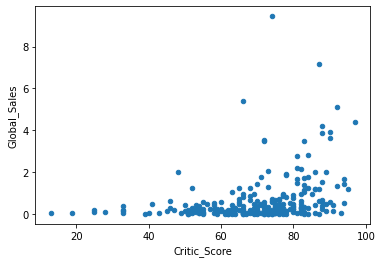

In [167]:
#Nuages de points
df.sample(500).plot.scatter(x='Critic_Score', y='Global_Sales')

<AxesSubplot:xlabel='Global_Sales'>

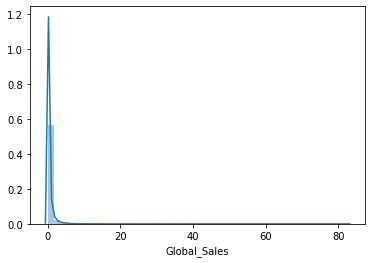

In [168]:
#Courbes de distribution
sb.distplot(df['Global_Sales'], vertical=False)

<AxesSubplot:xlabel='Critic_Score'>

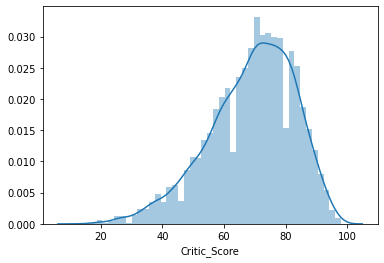

In [169]:
sb.distplot(df['Critic_Score'], vertical=False)

<AxesSubplot:xlabel='Year_of_Release'>

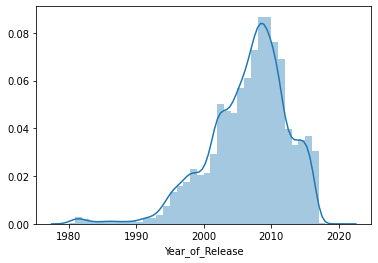

In [182]:
sb.distplot(df['Year_of_Release'], vertical=False, bins=40)

In [171]:
#GroupBy
df2 = df[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values('Global_Sales', ascending=False)
df2

,Global_Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10
PS,730.68
GBA,318.50
PS4,314.23
PSP,294.30


In [172]:
df3 = df[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False)
df3

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94
Role-Playing,934.40
Platform,828.08
Misc,803.18
Racing,728.90
Fighting,447.48
Simulation,390.42


In [173]:
df4 = df[['Publisher', 'Global_Sales']].groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)
df4

,Global_Sales
Publisher,
Nintendo,1788.81
Electronic Arts,1116.96
Activision,731.16
Sony Computer Entertainment,606.48
Ubisoft,471.61
...,...
Takuyo,0.01
EON Digital Entertainment,0.01
Paradox Development,0.01


In [174]:
df5 = df[['Developer', 'Global_Sales']].groupby('Developer').sum().sort_values('Global_Sales', ascending=False)
df5

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
...,...
Inferno Games,0.01
"Infinite Dreams, Paragon 5",0.01
Interchannel-Holon,0.01


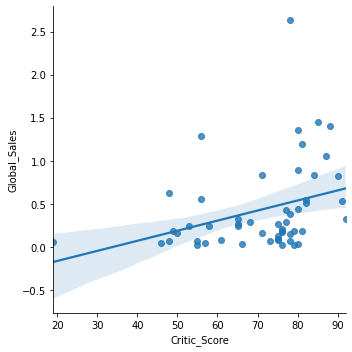

In [175]:
#lmplot
g = sb.lmplot(y="Global_Sales", x="Critic_Score", data=df.sample(100))

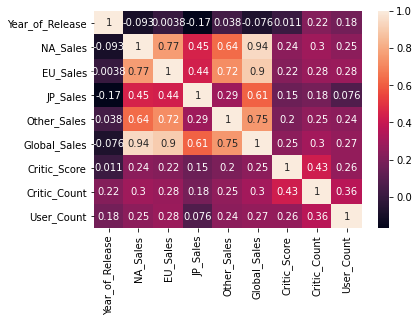

In [176]:
#heatmap
g = sb.heatmap(df.corr(), annot = True)

In [177]:
#Nintendo Sales Repartition
df6 = df[['Publisher', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Publisher').sum()
df6.query('Publisher == \'Nintendo\'')

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,,
Nintendo,1788.81,816.97,419.01,458.15,94.68
